# Zipf's law in poetry and prose

Zipf's law states that the frequency of a word is invesely proportional to its rank; that is, the most frequent word is twice as likely to occur in natural text as the second most frequent one and so on. Below I'm checking whether this holds for Shakespeare's English and contemporary English, based on the [Folger Shakespeare](https://shakespeare.folger.edu/cite/) and [COCA TV Corpus](https://www.corpusdata.org/formats.asp), respectively.

In [2]:
import os

# using this data structure to be able to easily add more corpora
corpora = { "Shakespeare" : { "path" : "../exercise-5/corpus/" },
            "COCA" :        { "path" : "../exercise-10/corpus/" } }

for corpus_name, corpus_data in corpora.items():
    # filter paths to make sure they don't contain directories, but only files
    corpus_data["file_paths"] = [os.path.join(corpus_data["path"], f) for f 
                                 in os.listdir(corpus_data["path"]) 
                                 if os.path.isfile(os.path.join(corpus_data["path"], f))]
    
print(corpora["COCA"]["file_paths"])

['../exercise-10/corpus/tv_text.txt']


In [3]:
### Note how we can use _ if we don't plan on using corpus_name in the loop
for _, corpus_data in corpora.items():
    corpus_data["tokens"] = []
    for path in corpus_data["file_paths"]:
        with open(path, "r", encoding="utf-8") as f:
            tokens = f.read().split()
            tokens = [token.lower().strip().strip(".,!?[]()=-") for token in tokens]
            corpus_data["tokens"].extend(tokens)

for _, corpus_data in corpora.items():
    corpus_data["tokens"] = [ token for token in corpus_data["tokens"]
                              if token != "" and not token.startswith("@")]
            
for corpus_name, corpus_data in corpora.items():
    print("Corpus {c} contains {t} tokens.".format(c=corpus_name, 
                                                   t=len(corpus_data["tokens"])))
    print(corpus_data["tokens"][:5])
    print()

Corpus Shakespeare contains 961105 tokens.
['much', 'ado', 'about', 'nothing', 'by']

Corpus COCA contains 2134860 tokens.
['chuck', 'houston', 'was', 'the', 'kind']



In [4]:
for _, corpus_data in corpora.items():
    corpus_data["token_counts"] = {}
    for token in corpus_data["tokens"]:
        if token in corpus_data["token_counts"]:
            corpus_data["token_counts"][token] = corpus_data["token_counts"][token] + 1
        else:
            corpus_data["token_counts"][token] = 1
        
for _, corpus_data in corpora.items():
    token_probabilities = { token : count / len(tokens)
                            for token, count in corpus_data["token_counts"].items() }
    sorted_token_probabilities = sorted(token_probabilities.items(), 
                                        key=lambda item: item[1], 
                                        reverse=True)
    
    corpus_data["token_probabilities"] = token_probabilities
    corpus_data["sorted_token_probabilities"] = sorted_token_probabilities
    corpus_data["sorted_tokens"] = [ word for (word, _) in sorted_token_probabilities ]
    corpus_data["sorted_probabilities"] = [ probability for (_, probability) in sorted_token_probabilities ]

for corpus_name, corpus_data in corpora.items():
    print("{c}'s most frequent tokens: {t}".format(c=corpus_name, t=corpus_data["sorted_tokens"][:5]))

Shakespeare's most frequent tokens: ['the', 'and', 'to', 'i', 'of']
COCA's most frequent tokens: ['you', 'i', 'the', 'to', 'a']


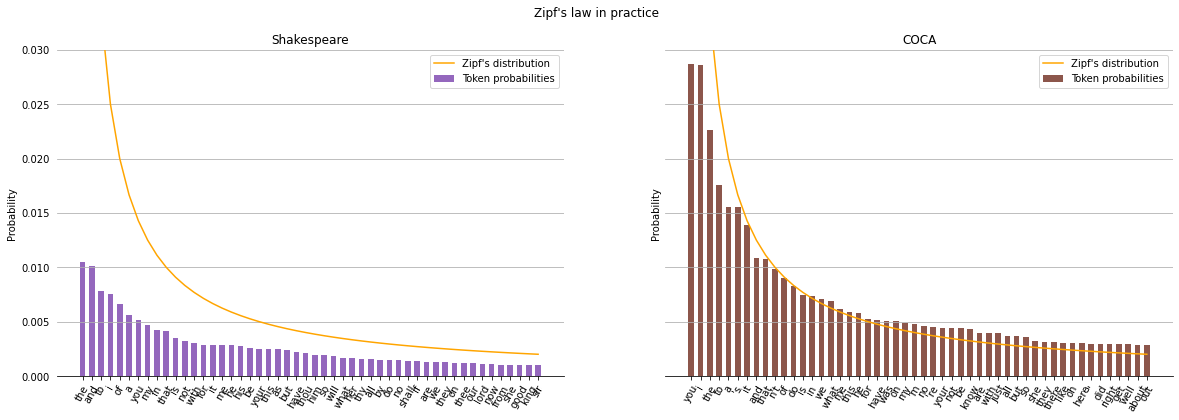

In [10]:
import matplotlib.pyplot as plt

top_n = 50
bar_width = 0.6

zipf_x = range(0, top_n)
zipf_y = [ 0.1 / (1+x) for x in zipf_x ]

figure, axes = plt.subplots(1, len(corpora), figsize=(20,6), sharey=True)

figure.suptitle("Zipf's law in practice")

for axis, corpus, color in zip(axes, corpora.items(), ["tab:purple", "tab:brown"]):
    corpus_name, corpus_data = corpus
    top_n_tokens = corpus_data["sorted_tokens"][:top_n]
    top_n_probabilities = corpus_data["sorted_probabilities"][:top_n]
    axis.bar(top_n_tokens, top_n_probabilities, bar_width, label="Token probabilities", color=color)
    
    axis.plot(zipf_x, zipf_y, "orange", label="Zipf's distribution")
    
    axis.set_ylim(0, 0.03)
    axis.set_title(corpus_name)
    axis.tick_params(axis='x', labelrotation = 60)
    axis.set_ylabel("Probability")
    axis.yaxis.grid()   
    axis.legend()
    axis.tick_params(left=False)
    
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['left'].set_visible(False)


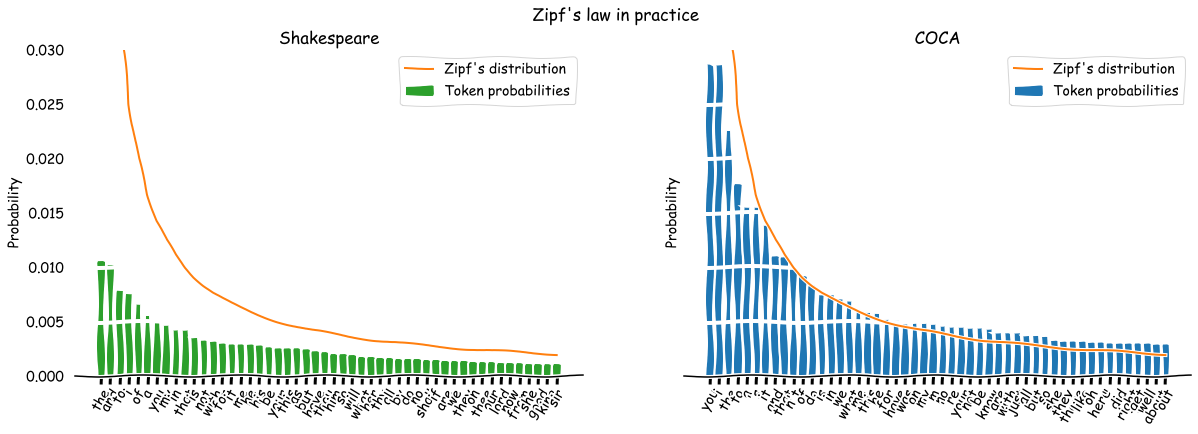

In [88]:
with plt.xkcd():
    
    figure, axes = plt.subplots(1, len(corpora), figsize=(20,6), sharey=True)
    figure.suptitle("Zipf's law in practice")

    for axis, corpus, color in zip(axes, corpora.items(), ["tab:green", "tab:blue"]):
        corpus_name, corpus_data = corpus
        top_n_tokens = corpus_data["sorted_tokens"][:top_n]
        top_n_probabilities = corpus_data["sorted_probabilities"][:top_n]
        axis.bar(top_n_tokens, top_n_probabilities, bar_width, label="Token probabilities", color=color)

        axis.plot(zipf_x, zipf_y, "tab:orange", label="Zipf's distribution")

        axis.set_ylim(0, 0.03)
        axis.set_title(corpus_name)
        axis.tick_params(axis='x', labelrotation = 60)
        axis.set_ylabel("Probability")
        axis.yaxis.grid()   
        axis.legend()
        axis.tick_params(left=False)

        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)
        axis.spines['left'].set_visible(False)
      